# Q5 Rossman Sales Regression problem

Types of regression

*   **Linear**: predicting a continuous value, i.e. What temperature will it be today?
*   **Logistic**: predicting category of your observation, i.e. Is this a cat or a dog?
*   **Poisson**: predicting a count value, i.e. How many dog will I see in the park?



In [0]:
# import needed libraries 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from pylab import fill_between
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.optimizers import Adam, RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping

from patsy import dmatrices
import statsmodels.api as sm


Using TensorFlow backend.


In [0]:
def plotTrainingHist(history, epoch, regType):
  plt.figure(figsize=(15,8))
  plt.plot(history.history['val_loss'])
  plt.plot(history.history['loss'])
  plt.xlabel('Epoch')
  plt.legend(['Val_Loss', 'Loss'], loc='upper left')
  plt.title(regType + ': Val Loss:' + str(round(np.mean(history.history['val_loss']),2)) + ' ' + 'Loss:'+ str(round(np.mean(history.history['loss']),2)), fontsize=14)
  plt.show()

def plotTrainingHist2(history, epoch, regType):
  plt.figure(figsize=(15,8))
  plt.plot(history.history['acc'])
  plt.plot(history.history['loss'])
  plt.xlabel('Epoch')
  plt.legend(['Accuracy', 'Loss'], loc='upper left')
  plt.title(regType + ': Accuracy:' + str(round(np.mean(history.history['acc']),2)) + ' ' + 'Loss:'+ str(round(np.mean(history.history['loss']),2)), fontsize=14)
  plt.show()

def plotTrainingHist3(history, epoch, regType):
  plt.figure(figsize=(15,8))
  plt.plot(history.history['acc'])
  plt.plot(history.history['loss'])
  plt.xlabel('Epoch')
  plt.legend(['Accuracy', 'Loss'], loc='upper left')
  plt.title(regType + ': Accuracy:' + str(round(np.mean(history.history['acc']),2)) + ' ' + 'Loss:'+ str(round(np.mean(history.history['loss']),2)), fontsize=14)
  plt.show()

def confMatrix(X_test, y_test, model, regType):
  y_pred1 = model.predict(X_test)
  y_pred = y_pred1.round(0)
  print(classification_report(y_test, y_pred))
  f, ax = plt.subplots(figsize=(13,8))
  model_y_pred1 = model.predict(X_test, verbose=1)
  model_y_pred= model_y_pred1.round(0)
  model_cm = confusion_matrix(y_test,model_y_pred,[0,1])
  sns.heatmap(model_cm, annot=True, fmt='g', cmap="RdBu", xticklabels = ["0", "1"] , yticklabels = ["0", "1"], ax=ax )
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.title(regType + ' : Confusion Matrix', fontsize=20)

def classReport(X_test, y_test, model):
  y_pred1 = model.predict(X_test)
  y_pred = y_pred1.round(0)
  print(classification_report(y_test, y_pred))

# Styles for Plotting # 
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)


### Exercise 5

Rossman Sales

In [0]:
import pandas as pd
ross_train = pd.read_csv('train.csv')
ross_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5.0,2015-07-31,5263.0,555.0,1.0,1.0,0,1.0
1,2,5.0,2015-07-31,6064.0,625.0,1.0,1.0,0,1.0
2,3,5.0,2015-07-31,8314.0,821.0,1.0,1.0,0,1.0
3,4,5.0,2015-07-31,13995.0,1498.0,1.0,1.0,0,1.0
4,5,5.0,2015-07-31,4822.0,559.0,1.0,1.0,0,1.0


In [0]:
ross_store = pd.read_csv('store.csv')
ross_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [0]:
print(ross_train.info())
print(ross_store.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308219 entries, 0 to 308218
Data columns (total 9 columns):
Store            308219 non-null int64
DayOfWeek        308218 non-null float64
Date             308218 non-null object
Sales            308218 non-null float64
Customers        308218 non-null float64
Open             308218 non-null float64
Promo            308218 non-null float64
StateHoliday     308218 non-null object
SchoolHoliday    308218 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 21.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
P

In [0]:
ross_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5.0,2015-07-31,5263.0,555.0,1.0,1.0,0,1.0
1,2,5.0,2015-07-31,6064.0,625.0,1.0,1.0,0,1.0
2,3,5.0,2015-07-31,8314.0,821.0,1.0,1.0,0,1.0
3,4,5.0,2015-07-31,13995.0,1498.0,1.0,1.0,0,1.0
4,5,5.0,2015-07-31,4822.0,559.0,1.0,1.0,0,1.0


In [0]:
ross_train.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
308214,930,4.0,2014-10-16,5668.0,1018.0,1.0,0.0,0,1.0
308215,931,4.0,2014-10-16,3573.0,480.0,1.0,0.0,0,1.0
308216,933,4.0,2014-10-16,6425.0,846.0,1.0,0.0,0,0.0
308217,934,4.0,2014-10-16,5378.0,596.0,1.0,0.0,0,1.0
308218,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
ross_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [0]:
ross_store.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


##### Data Preprocessing

In [0]:
# Duplicate Dropping
ross_train = ross_train.drop_duplicates()
ross_store = ross_store.drop_duplicates()

In [0]:
# Open Stores Analysis
ross_train=ross_train.drop(ross_train[(ross_train.Open == 0) & (ross_train.Sales == 0)].index)

In [0]:
ross_train = ross_train.reset_index(drop=True)

In [0]:
ross_train[ross_train.Customers == 0].sort_values(by=['Store'])

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
116587,674,4.0,2015-03-26,0.0,0.0,1.0,0.0,0,0.0
163494,699,4.0,2015-02-05,0.0,0.0,1.0,1.0,0,0.0
73090,971,5.0,2015-05-15,0.0,0.0,1.0,0.0,0,1.0


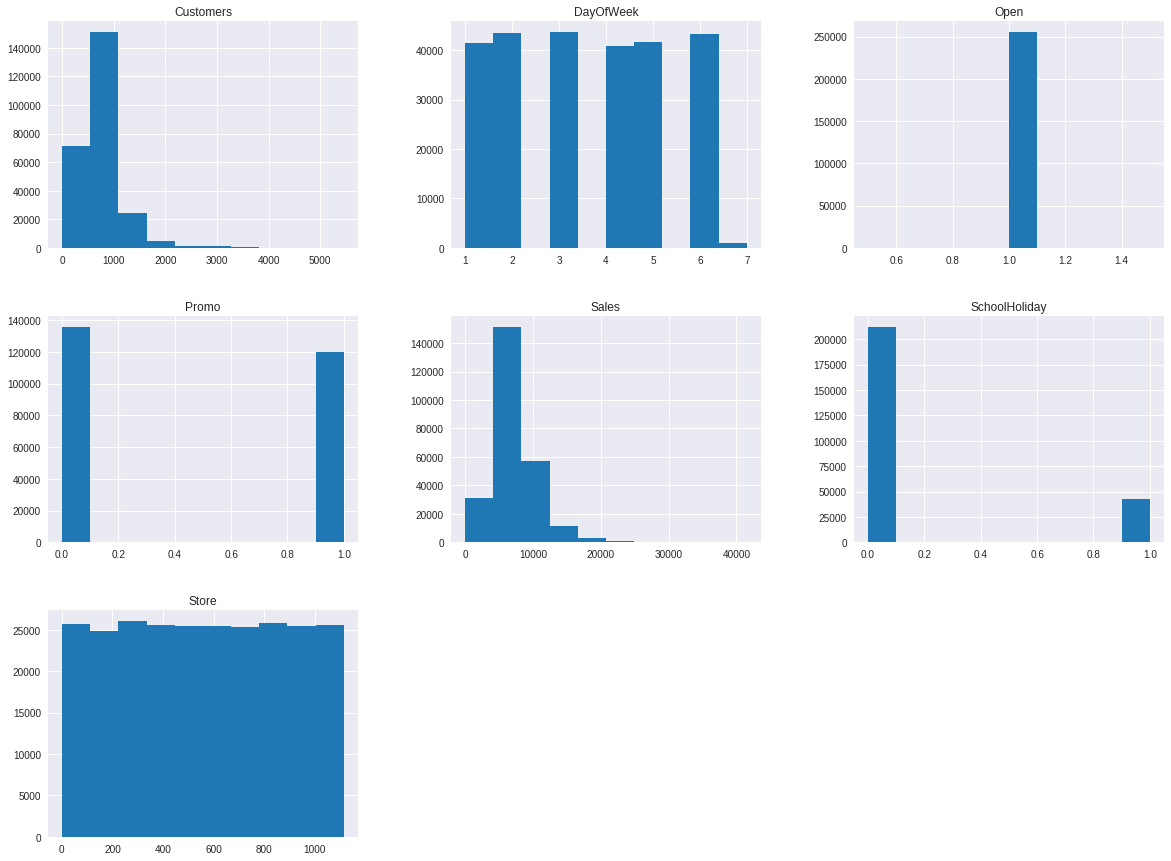

In [0]:
# Train Distribution
ross_train.hist(bins=10, figsize=(20,15),color=tableau20[0])
plt.show()

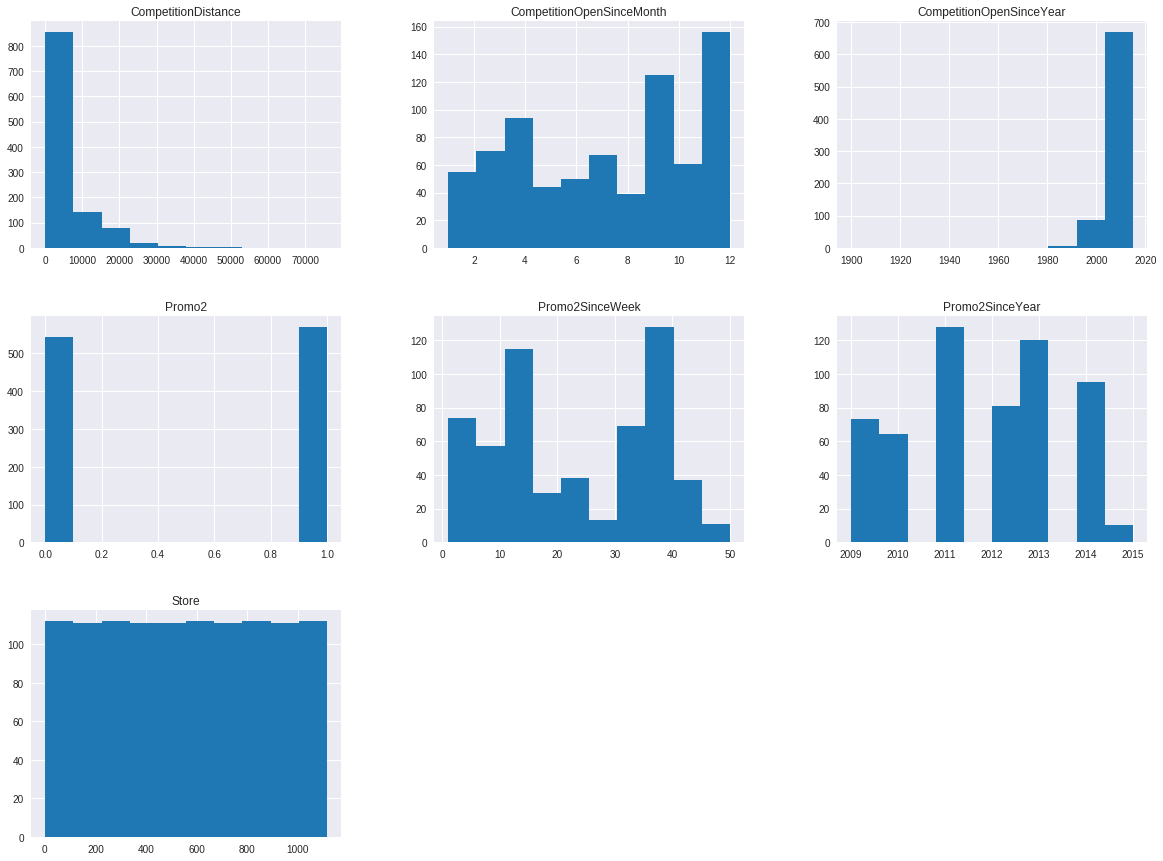

In [0]:
# Store Distribution
ross_store.hist(bins=10, figsize=(20,15),color=tableau20[0])
plt.show()

In [0]:
ross_train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,255343.000000,255342.000000,255342.000000,255342.000000,255342.0,255342.000000,255342.000000
mean,558.297435,3.515806,7234.201471,769.945779,1.0,0.468117,0.168014
std,321.708300,1.719830,3156.657896,401.101661,0.0,0.498983,0.373879
min,1.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,281.000000,2.000000,5101.000000,528.000000,1.0,0.000000,0.000000
50%,558.000000,3.000000,6643.000000,684.000000,1.0,0.000000,0.000000
75%,837.000000,5.000000,8675.000000,898.000000,1.0,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,5458.000000,1.0,1.000000,1.000000


In [0]:
ross_store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [0]:
#sns.pairplot(ross_train)

In [0]:
ross_train.count(0)/ross_train.shape[0] * 100

Store            100.000000
DayOfWeek         99.999608
Date              99.999608
Sales             99.999608
Customers         99.999608
Open              99.999608
Promo             99.999608
StateHoliday      99.999608
SchoolHoliday     99.999608
dtype: float64

In [0]:
ross_train=ross_train.drop(ross_train[(ross_train.Open == 1) & (ross_train.Sales == 0)].index)
ross_train = ross_train.reset_index(drop=True) 

In [0]:
{"Mean":np.mean(ross_train.Sales),"Median":np.median(ross_train.Sales)}
#3.21% (considered outliers).
#0.00% no sales at all.

{'Mean': 7234.2864662272505, 'Median': nan}

In [0]:
ross_train.Sales.describe() 

count    255339.000000
mean       7234.286466
std        3156.579044
min          46.000000
25%        5101.000000
50%        6643.000000
75%        8675.000000
max       41551.000000
Name: Sales, dtype: float64

In [0]:
print ("{0:.2f}% (considered outliers).".format(ross_train[ross_train.Customers>1500].count()[0]/ross_train.shape[0]*100))
print ("{0:.2f}% no customers at all.".format(ross_train[ross_train.Customers==0].count()[0]/ross_train.shape[0]*100))

4.35% (considered outliers).
0.00% no customers at all.


In [0]:
ross_train[ross_train.Customers>7000]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


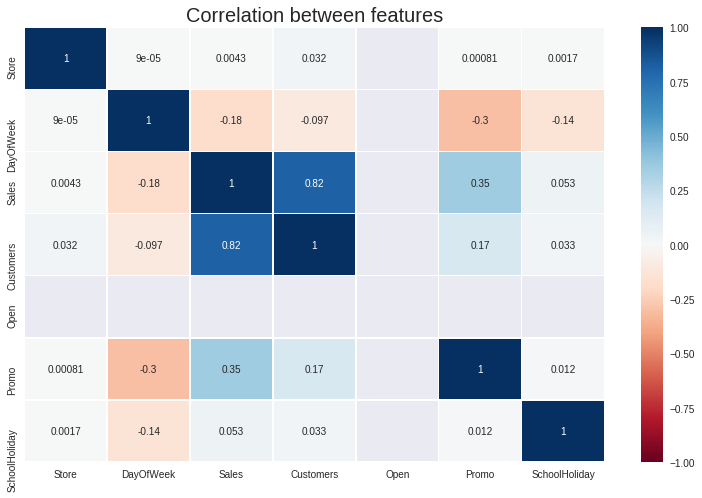

In [0]:
f, ax = plt.subplots(figsize=(13,8))
ax = sns.heatmap(ross_train.corr(),cmap="RdBu", annot=True, xticklabels=True, yticklabels=True, linewidths=.5, vmin=-1, vmax=1, ax=ax)
ax.set_title('Correlation between features', fontsize=20);

In [0]:
ross_train.count(0)/ross_train.shape[0] * 100

Store            100.000000
DayOfWeek         99.999608
Date              99.999608
Sales             99.999608
Customers         99.999608
Open              99.999608
Promo             99.999608
StateHoliday      99.999608
SchoolHoliday     99.999608
dtype: float64

**Store Data Set**

In [0]:
ross_store.count(0)/ross_store.shape[0] * 100

Store                        100.000000
StoreType                    100.000000
Assortment                   100.000000
CompetitionDistance           99.730942
CompetitionOpenSinceMonth     68.251121
CompetitionOpenSinceYear      68.251121
Promo2                       100.000000
Promo2SinceWeek               51.210762
Promo2SinceYear               51.210762
PromoInterval                 51.210762
dtype: float64

In [0]:
ross_store[pd.isnull(ross_store.CompetitionDistance)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [0]:
ross_store[pd.isnull(ross_store.CompetitionOpenSinceMonth)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [0]:
ross_store[pd.isnull(ross_store.CompetitionOpenSinceYear)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [0]:
{"Mean":np.nanmean(ross_store.CompetitionDistance),"Median":np.nanmedian(ross_store.CompetitionDistance),"Standard Dev":np.nanstd(ross_store.CompetitionDistance)}

{'Mean': 5404.901079136691,
 'Median': 2325.0,
 'Standard Dev': 7659.7282732764415}

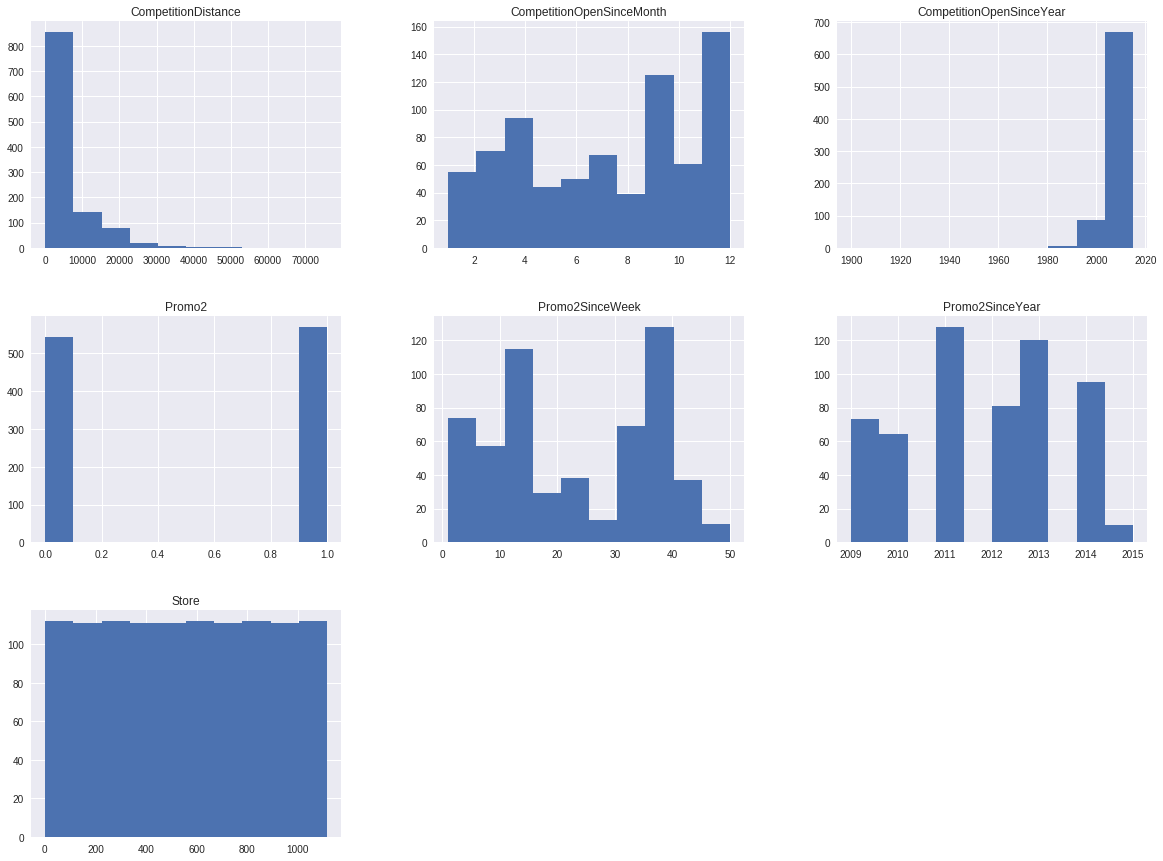

In [0]:
ross_store.hist(bins=10, figsize=(20,15))
plt.show()

In [0]:
ross_store['CompetitionDistance'].fillna(ross_store['CompetitionDistance'].median(), inplace = True)
ross_store.CompetitionOpenSinceMonth.fillna(0, inplace = True)
ross_store.CompetitionOpenSinceYear.fillna(0,inplace=True)

In [0]:
ross_store[pd.isnull(ross_store.Promo2SinceWeek)& (ross_store.Promo2==0)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,0.0,0.0,0,NaN,NaN,NaN


In [0]:
ross_store.Promo2SinceWeek.fillna(0,inplace=True)
ross_store.Promo2SinceYear.fillna(0,inplace=True)
ross_store.PromoInterval.fillna(0,inplace=True)

In [0]:
ross_store.count(0)/ross_store.shape[0] * 100

Store                        100.0
StoreType                    100.0
Assortment                   100.0
CompetitionDistance          100.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                       100.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64

In [0]:
ross_train_store = pd.merge(ross_train, ross_store, how = 'left', on = 'Store')
ross_train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5.0,2015-07-31,5263.0,555.0,1.0,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5.0,2015-07-31,6064.0,625.0,1.0,1.0,0,1.0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5.0,2015-07-31,8314.0,821.0,1.0,1.0,0,1.0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5.0,2015-07-31,13995.0,1498.0,1.0,1.0,0,1.0,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5.0,2015-07-31,4822.0,559.0,1.0,1.0,0,1.0,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [0]:
ross_train_store['SalesperCustomer'] = ross_train_store['Sales']/ross_train_store['Customers']
ross_train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesperCustomer
0,1,5.0,2015-07-31,5263.0,555.0,1.0,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.482883
1,2,5.0,2015-07-31,6064.0,625.0,1.0,1.0,0,1.0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",9.702400
2,3,5.0,2015-07-31,8314.0,821.0,1.0,1.0,0,1.0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",10.126675
3,4,5.0,2015-07-31,13995.0,1498.0,1.0,1.0,0,1.0,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,9.342457
4,5,5.0,2015-07-31,4822.0,559.0,1.0,1.0,0,1.0,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,8.626118


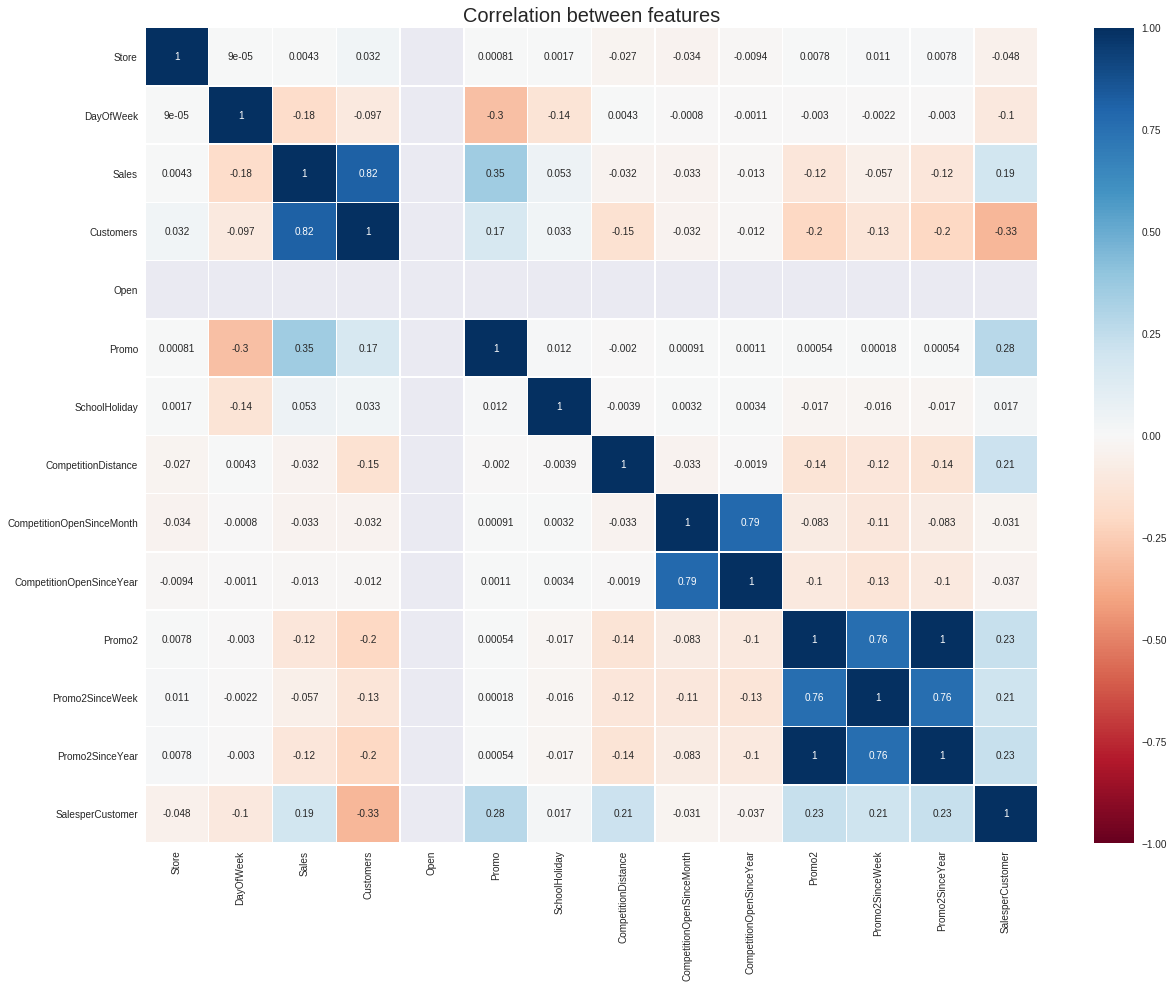

In [0]:
f, ax = plt.subplots(figsize=(20,15))
ax = sns.heatmap(ross_train_store.corr(),cmap="RdBu", annot=True, xticklabels=True, yticklabels=True, linewidths=.5, vmin=-1, vmax=1, ax=ax)
ax.set_title('Correlation between features', fontsize=20);

In [0]:
ross_train_store['Date'] = pd.to_datetime(ross_train_store['Date'], errors='coerce')
ross_train_store['Month']=ross_train_store.Date.dt.month
ross_train_store['Year']=ross_train_store.Date.dt.year

In [0]:
ross_train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesperCustomer,Month,Year
0,1,5.0,2015-07-31,5263.0,555.0,1.0,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.482883,7.0,2015.0
1,2,5.0,2015-07-31,6064.0,625.0,1.0,1.0,0,1.0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",9.702400,7.0,2015.0
2,3,5.0,2015-07-31,8314.0,821.0,1.0,1.0,0,1.0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",10.126675,7.0,2015.0
3,4,5.0,2015-07-31,13995.0,1498.0,1.0,1.0,0,1.0,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,9.342457,7.0,2015.0
4,5,5.0,2015-07-31,4822.0,559.0,1.0,1.0,0,1.0,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,8.626118,7.0,2015.0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


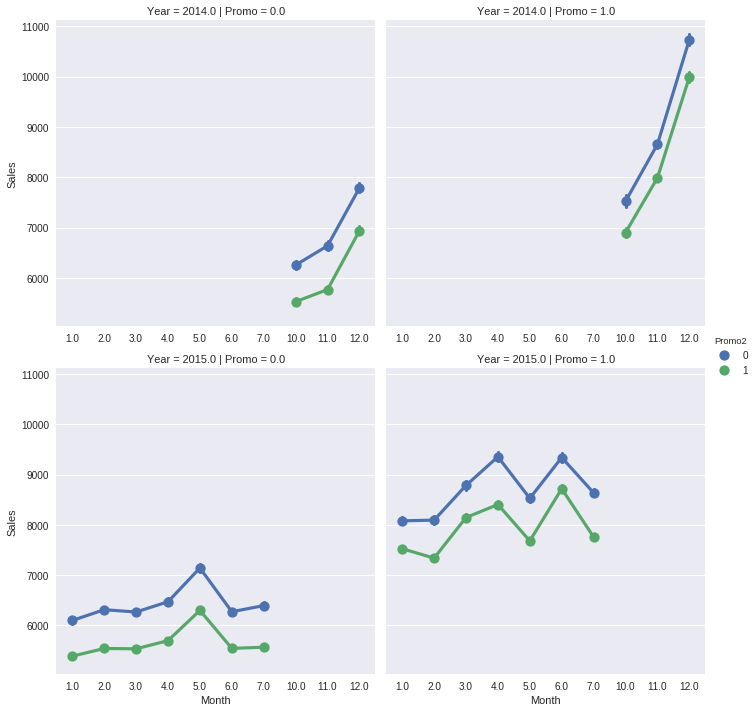

In [0]:
sns.factorplot(data = ross_train_store, x ="Month", y = "Sales", 
               col = 'Promo', # per store type in cols
               hue = 'Promo2',
               row = "Year"
              ,sharex=False)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


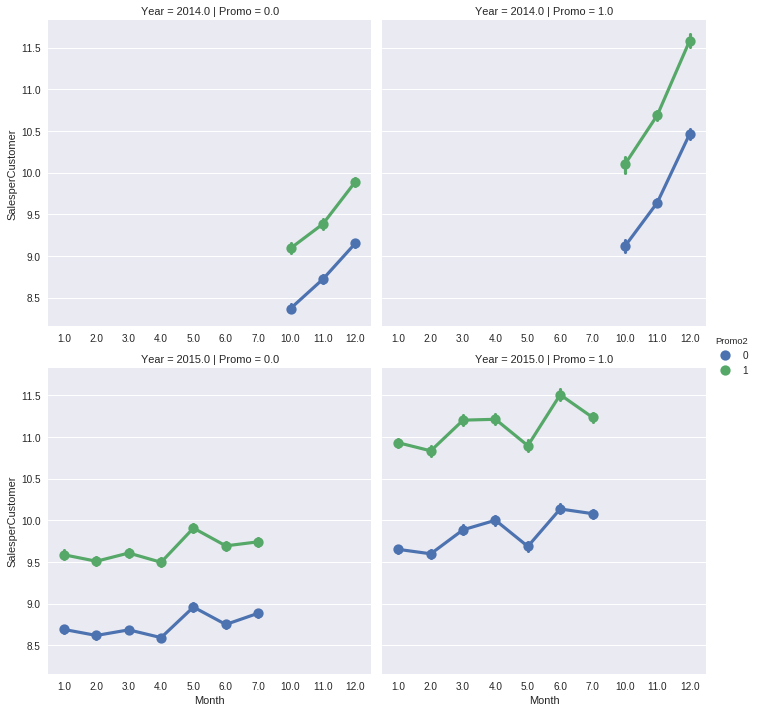

In [0]:
sns.factorplot(data = ross_train_store, x ="Month", y = "SalesperCustomer", 
               col = 'Promo', # per store type in cols
               hue = 'Promo2',
               row = "Year"
              ,sharex=False)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


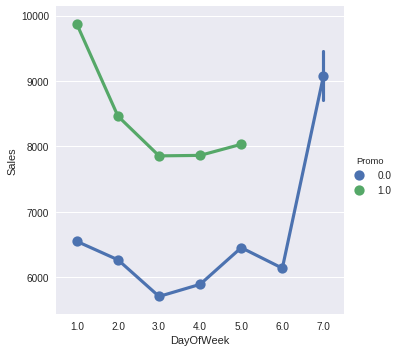

In [0]:
sns.factorplot(data = ross_train_store, x ="DayOfWeek", y = "Sales",
                hue='Promo'
              ,sharex=False)

In [0]:
# Consider stores that are only open on Sunday
print ("Sunday open stores:{}" .format(ross_train_store[(ross_train_store.Open == 1) & (ross_train_store.DayOfWeek == 7)]['Store'].unique().shape[0]))

Sunday open stores:33


In [0]:
ross_train_store['CompetitionDist_Cat']=pd.cut(ross_train_store['CompetitionDistance'], 5)
ross_train_store.groupby(by="CompetitionDist_Cat").Sales.mean(),ross_train_store.groupby(by="CompetitionDist_Cat").Customers.mean()

(CompetitionDist_Cat
 (-55.84, 15188.0]     7240.157198
 (15188.0, 30356.0]    7292.129847
 (30356.0, 45524.0]    6697.247882
 (45524.0, 60692.0]    6155.246701
 (60692.0, 75860.0]    7689.003731
 Name: Sales, dtype: float64, CompetitionDist_Cat
 (-55.84, 15188.0]     779.257849
 (15188.0, 30356.0]    693.813271
 (30356.0, 45524.0]    679.796988
 (45524.0, 60692.0]    634.752284
 (60692.0, 75860.0]    865.619403
 Name: Customers, dtype: float64)

In [0]:
del ross_train_store["CompetitionDist_Cat"]
ross_train_store['Day']= ross_train_store.Date.dt.day
del ross_train_store["Date"]

In [0]:
ross_train_store['StateHoliday'] = ross_train_store['StateHoliday'].astype('category')
ross_train_store['Assortment'] = ross_train_store['Assortment'].astype('category')
ross_train_store['StoreType'] = ross_train_store['StoreType'].astype('category')
ross_train_store['PromoInterval']= ross_train_store['PromoInterval'].astype('category')
ross_train_store['StateHoliday_cat'] = ross_train_store['StateHoliday'].cat.codes
ross_train_store['Assortment_cat'] = ross_train_store['Assortment'].cat.codes
ross_train_store['StoreType_cat'] = ross_train_store['StoreType'].cat.codes
ross_train_store['PromoInterval_cat'] = ross_train_store['PromoInterval'].cat.codes
ross_train_store['StateHoliday_cat'] = ross_train_store['StateHoliday_cat'].astype('float')
ross_train_store['Assortment_cat'] = ross_train_store['Assortment_cat'].astype('float')
ross_train_store['StoreType_cat'] = ross_train_store['StoreType_cat'].astype('float')
ross_train_store['PromoInterval_cat'] = ross_train_store['PromoInterval_cat'].astype('float')

In [0]:
ross_train_store.dtypes

Store                           int64
DayOfWeek                     float64
Sales                         float64
Customers                     float64
Open                          float64
Promo                         float64
StateHoliday                 category
SchoolHoliday                 float64
StoreType                    category
Assortment                   category
CompetitionDistance           float64
CompetitionOpenSinceMonth     float64
CompetitionOpenSinceYear      float64
Promo2                          int64
Promo2SinceWeek               float64
Promo2SinceYear               float64
PromoInterval                category
SalesperCustomer              float64
Month                         float64
Year                          float64
Day                           float64
StateHoliday_cat              float64
Assortment_cat                float64
StoreType_cat                 float64
PromoInterval_cat             float64
dtype: object

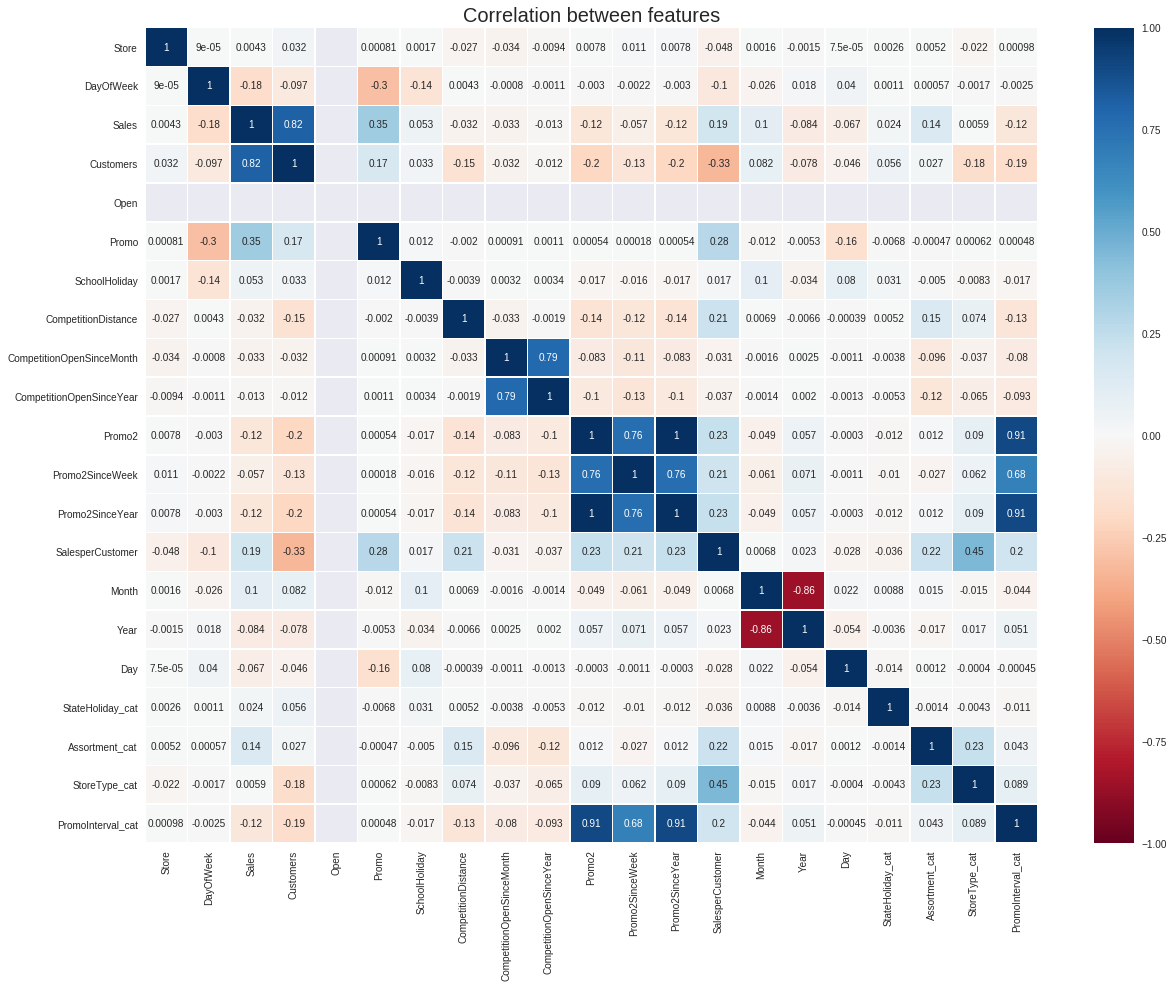

In [0]:
f, ax = plt.subplots(figsize=(20,15))
ax = sns.heatmap(ross_train_store.corr(),cmap="RdBu", annot=True, xticklabels=True, yticklabels=True, linewidths=.5, vmin=-1, vmax=1, ax=ax)
ax.set_title('Correlation between features', fontsize=20);

In [0]:
ross_train_store.count(0)/ross_train_store.shape[0] * 100

Store                        100.000000
DayOfWeek                     99.999608
Sales                         99.999608
Customers                     99.999608
Open                          99.999608
Promo                         99.999608
StateHoliday                  99.999608
SchoolHoliday                 99.999608
StoreType                    100.000000
Assortment                   100.000000
CompetitionDistance          100.000000
CompetitionOpenSinceMonth    100.000000
CompetitionOpenSinceYear     100.000000
Promo2                       100.000000
Promo2SinceWeek              100.000000
Promo2SinceYear              100.000000
PromoInterval                100.000000
SalesperCustomer              99.999608
Month                         99.999608
Year                          99.999608
Day                           99.999608
StateHoliday_cat             100.000000
Assortment_cat               100.000000
StoreType_cat                100.000000
PromoInterval_cat            100.000000


In [0]:
ross_train_store['CompetitionOpenSince'] = np.where((ross_train_store['CompetitionOpenSinceMonth']==0) & (ross_train_store['CompetitionOpenSinceYear']==0) , 0,(ross_train_store.Month - ross_train_store.CompetitionOpenSinceMonth) + 
                                       (12 * (ross_train_store.Year - ross_train_store.CompetitionOpenSinceYear)) )

In [0]:
del ross_train_store['CompetitionOpenSinceYear']
del ross_train_store['CompetitionOpenSinceMonth']

In [0]:
ross_train_store["is_holiday_state"] = ross_train_store['StateHoliday'].map({"0": 0, "a": 1, "b": 1, "c": 1})
del ross_train_store['StateHoliday_cat']

In [0]:
ross_train_store=pd.get_dummies(ross_train_store, columns=["Assortment", "StoreType","PromoInterval"], prefix=["is_Assortment", "is_StoreType","is_PromoInteval"])

In [0]:
del ross_train_store['Assortment_cat']
del ross_train_store['StoreType_cat']
del ross_train_store['PromoInterval_cat']

In [0]:
ross_train_store.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,SalesperCustomer,Month,Year,Day,CompetitionOpenSince,is_holiday_state,is_Assortment_a,is_Assortment_b,is_Assortment_c,is_StoreType_a,is_StoreType_b,is_StoreType_c,is_StoreType_d,is_PromoInteval_0,"is_PromoInteval_Feb,May,Aug,Nov","is_PromoInteval_Jan,Apr,Jul,Oct","is_PromoInteval_Mar,Jun,Sept,Dec"
0,1,5.0,5263.0,555.0,1.0,1.0,0,1.0,1270.0,0,0.0,0.0,9.482883,7.0,2015.0,31.0,82.0,0.0,1,0,0,0,0,1,0,1,0,0,0
1,2,5.0,6064.0,625.0,1.0,1.0,0,1.0,570.0,1,13.0,2010.0,9.702400,7.0,2015.0,31.0,92.0,0.0,1,0,0,1,0,0,0,0,0,1,0
2,3,5.0,8314.0,821.0,1.0,1.0,0,1.0,14130.0,1,14.0,2011.0,10.126675,7.0,2015.0,31.0,103.0,0.0,1,0,0,1,0,0,0,0,0,1,0
3,4,5.0,13995.0,1498.0,1.0,1.0,0,1.0,620.0,0,0.0,0.0,9.342457,7.0,2015.0,31.0,70.0,0.0,0,0,1,0,0,1,0,1,0,0,0
4,5,5.0,4822.0,559.0,1.0,1.0,0,1.0,29910.0,0,0.0,0.0,8.626118,7.0,2015.0,31.0,3.0,0.0,1,0,0,1,0,0,0,1,0,0,0


In [0]:
ross_train_store = ross_train_store.drop(['Open'],axis=1)

In [0]:
ross_train_store.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,SalesperCustomer,Month,Year,Day,CompetitionOpenSince,is_holiday_state,is_Assortment_a,is_Assortment_b,is_Assortment_c,is_StoreType_a,is_StoreType_b,is_StoreType_c,is_StoreType_d,is_PromoInteval_0,"is_PromoInteval_Feb,May,Aug,Nov","is_PromoInteval_Jan,Apr,Jul,Oct","is_PromoInteval_Mar,Jun,Sept,Dec"
count,255340.000000,255339.000000,255339.000000,255339.000000,255339.000000,255339.000000,255340.000000,255340.000000,255340.000000,255340.000000,255339.000000,255339.000000,255339.000000,255339.000000,255340.000000,255339.000000,255340.000000,255340.000000,255340.000000,255340.000000,255340.000000,255340.000000,255340.000000,255340.000000,255340.000000,255340.000000,255340.000000
mean,558.294815,3.515797,7234.286466,769.954825,0.468119,0.168012,5453.421086,0.494137,11.428315,994.081002,9.781364,5.684905,2014.767721,16.283897,48.530649,0.001124,0.525519,0.009877,0.464604,0.541831,0.018928,0.134530,0.304711,0.505863,0.115846,0.282443,0.095849
std,321.708951,1.719837,3156.579044,401.095335,0.498984,0.373878,7809.560344,0.499967,15.222493,1005.808931,2.248559,3.525249,0.422287,8.660737,67.186816,0.033507,0.499349,0.098891,0.498747,0.498248,0.136270,0.341222,0.460286,0.499967,0.320040,0.450189,0.294384
min,1.000000,1.000000,46.000000,8.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,2.940405,1.000000,2014.000000,1.000000,-10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,281.000000,2.000000,5101.000000,528.000000,0.000000,0.000000,710.000000,0.000000,0.000000,0.000000,8.135593,3.000000,2015.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,558.000000,3.000000,6643.000000,684.000000,0.000000,0.000000,2325.000000,0.000000,0.000000,0.000000,9.539499,5.000000,2015.000000,17.000000,27.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,837.000000,5.000000,8675.000000,898.000000,1.000000,0.000000,6880.000000,1.000000,18.000000,2012.000000,11.225310,7.000000,2015.000000,24.000000,84.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,5458.000000,1.000000,1.000000,75860.000000,1.000000,50.000000,2015.000000,24.901205,12.000000,2015.000000,31.000000,1386.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Test Data Set**

In [0]:
ross_test = pd.read_csv('test.csv')

In [0]:
ross_test.count(0)/ross_test.shape[0] * 100

Id               100.000000
Store            100.000000
DayOfWeek        100.000000
Date             100.000000
Open              99.973228
Promo            100.000000
StateHoliday     100.000000
SchoolHoliday    100.000000
dtype: float64

In [0]:
ross_test.fillna(1, inplace = True) #11rows with Nans decided to leave them open since its one store 622 which is 
ross_test_store = pd.merge(ross_test, ross_store, how = 'left', on = 'Store')
print ("The Test_Store dataset has {} Rows and {} Variables".format(str(ross_test_store.shape[0]),str(ross_test_store.shape[1]))) 
ross_test_store['Date'] = pd.to_datetime(ross_test_store['Date'], errors='coerce')
ross_test_store['Month']= ross_test_store.Date.dt.month
ross_test_store['Year']= ross_test_store.Date.dt.year
ross_test_store['Day']= ross_test_store.Date.dt.day

The Test_Store dataset has 41088 Rows and 17 Variables


In [0]:
ross_test_store['StateHoliday'] = ross_test_store['StateHoliday'].astype('category')
ross_test_store['Assortment'] = ross_test_store['Assortment'].astype('category')
ross_test_store['StoreType'] = ross_test_store['StoreType'].astype('category')
ross_test_store['PromoInterval']= ross_test_store['PromoInterval'].astype('category')
ross_test_store['StateHoliday_cat'] = ross_test_store['StateHoliday'].cat.codes
ross_test_store['Assortment_cat'] = ross_test_store['Assortment'].cat.codes
ross_test_store['StoreType_cat'] = ross_test_store['StoreType'].cat.codes
ross_test_store['PromoInterval_cat'] = ross_test_store['PromoInterval'].cat.codes
ross_test_store['StateHoliday_cat'] = ross_test_store['StateHoliday_cat'].astype('float')
ross_test_store['Assortment_cat'] = ross_test_store['Assortment_cat'].astype('float')
ross_test_store['StoreType_cat'] = ross_test_store['StoreType_cat'].astype('float')
ross_test_store['PromoInterval_cat'] = ross_test_store['PromoInterval_cat'].astype('float')
ross_test_store['CompetitionOpenSince'] = np.where((ross_test_store['CompetitionOpenSinceMonth']==0) & (ross_test_store['CompetitionOpenSinceYear']==0) , 0,(ross_test_store.Month - ross_test_store.CompetitionOpenSinceMonth) + 
                                       (12 * (ross_test_store.Year - ross_test_store.CompetitionOpenSinceYear)) )
ross_test_store["is_holiday_state"] = ross_test_store['StateHoliday'].map({"0": 0, "a": 1, "b": 1, "c": 1})
ross_test_store=pd.get_dummies(ross_test_store, columns=["Assortment", "StoreType","PromoInterval"], prefix=["is_Assortment", "is_StoreType","is_PromoInteval"])


In [0]:
del ross_test_store["Date"]
del ross_test_store['CompetitionOpenSinceYear']
del ross_test_store['CompetitionOpenSinceMonth']
del ross_test_store['StateHoliday_cat']
del ross_test_store['Assortment_cat']
del ross_test_store['StoreType_cat']
del ross_test_store['PromoInterval_cat']
del ross_test_store['StateHoliday']
del ross_train_store['StateHoliday']

In [0]:
ross_train_store.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,SalesperCustomer,Month,Year,Day,CompetitionOpenSince,is_holiday_state,is_Assortment_a,is_Assortment_b,is_Assortment_c,is_StoreType_a,is_StoreType_b,is_StoreType_c,is_StoreType_d,is_PromoInteval_0,"is_PromoInteval_Feb,May,Aug,Nov","is_PromoInteval_Jan,Apr,Jul,Oct","is_PromoInteval_Mar,Jun,Sept,Dec"
count,255340.000000,255339.000000,255339.000000,255339.000000,255339.000000,255339.000000,255340.000000,255340.000000,255340.000000,255340.000000,255339.000000,255339.000000,255339.000000,255339.000000,255340.000000,255339.000000,255340.000000,255340.000000,255340.000000,255340.000000,255340.000000,255340.000000,255340.000000,255340.000000,255340.000000,255340.000000,255340.000000
mean,558.294815,3.515797,7234.286466,769.954825,0.468119,0.168012,5453.421086,0.494137,11.428315,994.081002,9.781364,5.684905,2014.767721,16.283897,48.530649,0.001124,0.525519,0.009877,0.464604,0.541831,0.018928,0.134530,0.304711,0.505863,0.115846,0.282443,0.095849
std,321.708951,1.719837,3156.579044,401.095335,0.498984,0.373878,7809.560344,0.499967,15.222493,1005.808931,2.248559,3.525249,0.422287,8.660737,67.186816,0.033507,0.499349,0.098891,0.498747,0.498248,0.136270,0.341222,0.460286,0.499967,0.320040,0.450189,0.294384
min,1.000000,1.000000,46.000000,8.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,2.940405,1.000000,2014.000000,1.000000,-10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,281.000000,2.000000,5101.000000,528.000000,0.000000,0.000000,710.000000,0.000000,0.000000,0.000000,8.135593,3.000000,2015.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,558.000000,3.000000,6643.000000,684.000000,0.000000,0.000000,2325.000000,0.000000,0.000000,0.000000,9.539499,5.000000,2015.000000,17.000000,27.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,837.000000,5.000000,8675.000000,898.000000,1.000000,0.000000,6880.000000,1.000000,18.000000,2012.000000,11.225310,7.000000,2015.000000,24.000000,84.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,5458.000000,1.000000,1.000000,75860.000000,1.000000,50.000000,2015.000000,24.901205,12.000000,2015.000000,31.000000,1386.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
scale_features = ['Store','DayOfWeek','Sales','Customers','CompetitionDistance','Promo2SinceWeek', 'Promo2SinceYear','SalesperCustomer','CompetitionOpenSince','Month','Year','Day']

In [0]:
ross_train_store.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,SalesperCustomer,Month,Year,Day,CompetitionOpenSince,is_holiday_state,is_Assortment_a,is_Assortment_b,is_Assortment_c,is_StoreType_a,is_StoreType_b,is_StoreType_c,is_StoreType_d,is_PromoInteval_0,"is_PromoInteval_Feb,May,Aug,Nov","is_PromoInteval_Jan,Apr,Jul,Oct","is_PromoInteval_Mar,Jun,Sept,Dec"
count,255340.000000,255339.000000,255339.000000,255339.000000,255339.000000,255339.000000,255340.000000,255340.000000,255340.000000,255340.000000,255339.000000,255339.000000,255339.000000,255339.000000,255340.000000,255339.000000,255340.000000,255340.000000,255340.000000,255340.000000,255340.000000,255340.000000,255340.000000,255340.000000,255340.000000,255340.000000,255340.000000
mean,558.294815,3.515797,7234.286466,769.954825,0.468119,0.168012,5453.421086,0.494137,11.428315,994.081002,9.781364,5.684905,2014.767721,16.283897,48.530649,0.001124,0.525519,0.009877,0.464604,0.541831,0.018928,0.134530,0.304711,0.505863,0.115846,0.282443,0.095849
std,321.708951,1.719837,3156.579044,401.095335,0.498984,0.373878,7809.560344,0.499967,15.222493,1005.808931,2.248559,3.525249,0.422287,8.660737,67.186816,0.033507,0.499349,0.098891,0.498747,0.498248,0.136270,0.341222,0.460286,0.499967,0.320040,0.450189,0.294384
min,1.000000,1.000000,46.000000,8.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,2.940405,1.000000,2014.000000,1.000000,-10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,281.000000,2.000000,5101.000000,528.000000,0.000000,0.000000,710.000000,0.000000,0.000000,0.000000,8.135593,3.000000,2015.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,558.000000,3.000000,6643.000000,684.000000,0.000000,0.000000,2325.000000,0.000000,0.000000,0.000000,9.539499,5.000000,2015.000000,17.000000,27.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,837.000000,5.000000,8675.000000,898.000000,1.000000,0.000000,6880.000000,1.000000,18.000000,2012.000000,11.225310,7.000000,2015.000000,24.000000,84.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,5458.000000,1.000000,1.000000,75860.000000,1.000000,50.000000,2015.000000,24.901205,12.000000,2015.000000,31.000000,1386.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
ross_train_store.count(0)/ross_train_store.shape[0] * 100

Store                               100.000000
DayOfWeek                            99.999608
Sales                                99.999608
Customers                            99.999608
Promo                                99.999608
SchoolHoliday                        99.999608
CompetitionDistance                 100.000000
Promo2                              100.000000
Promo2SinceWeek                     100.000000
Promo2SinceYear                     100.000000
SalesperCustomer                     99.999608
Month                                99.999608
Year                                 99.999608
Day                                  99.999608
CompetitionOpenSince                100.000000
is_holiday_state                     99.999608
is_Assortment_a                     100.000000
is_Assortment_b                     100.000000
is_Assortment_c                     100.000000
is_StoreType_a                      100.000000
is_StoreType_b                      100.000000
is_StoreType_

In [0]:
{"Mean":np.nanmean(ross_train_store.is_holiday_state),"Median":np.nanmedian(ross_train_store.is_holiday_state),"Standard Dev":np.nanstd(ross_train_store.is_holiday_state)}

{'Mean': 0.0011239959426487924,
 'Median': 0.0,
 'Standard Dev': 0.03350720184929953}

In [0]:
ross_train_store.is_holiday_state.fillna(0,inplace=True)

In [0]:
ross_train_store.count(0)/ross_train_store.shape[0] * 100

Store                               100.000000
DayOfWeek                            99.999608
Sales                                99.999608
Customers                            99.999608
Promo                                99.999608
SchoolHoliday                        99.999608
CompetitionDistance                 100.000000
Promo2                              100.000000
Promo2SinceWeek                     100.000000
Promo2SinceYear                     100.000000
SalesperCustomer                     99.999608
Month                                99.999608
Year                                 99.999608
Day                                  99.999608
CompetitionOpenSince                100.000000
is_holiday_state                    100.000000
is_Assortment_a                     100.000000
is_Assortment_b                     100.000000
is_Assortment_c                     100.000000
is_StoreType_a                      100.000000
is_StoreType_b                      100.000000
is_StoreType_

### Regression Proper

In [0]:
ross_train_store  = ross_train_store.dropna()

In [0]:
output_features = ['Customers', 'Sales', 'SalesperCustomer']
output_features2 = ['Customers','Sales']

X = ross_train_store.drop(output_features, axis = 1).values
y = ross_train_store[output_features2].values

#### Basic Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

ls = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state=0)
ls.fit(X_train, y_train)
y_pred = ls.predict(X_test)

<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


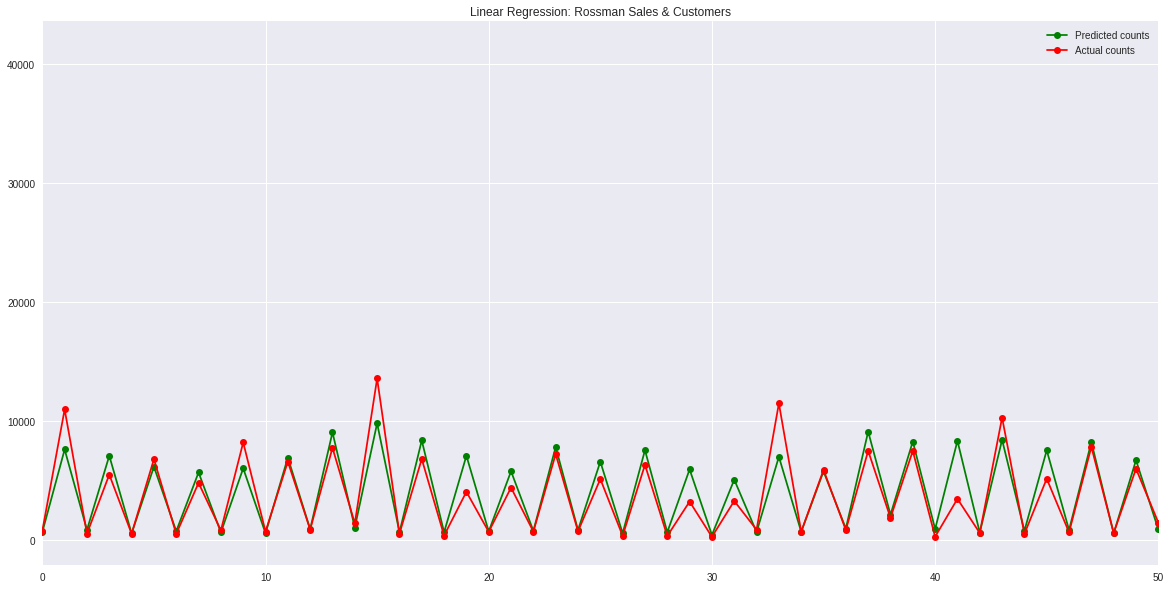

In [0]:
fig = plt.figure()
plt.figure(figsize=(20,10))
plt.title('Linear Regression: Rossman Sales & Customers')
plt.xlim(0,50)
predicted, = plt.plot(pd.DataFrame(y_pred.flatten()), 'go-', label='Predicted counts')
actual, = plt.plot(pd.DataFrame(y_test.flatten()), 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
 
plt.show()

In [0]:
d1_linear = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
d1_linear

,Actual,Predicted
0,794.0,680.187627
1,10992.0,7626.672721
2,543.0,866.537344
3,5512.0,7094.878925
4,540.0,566.969759
...,...,...
153199,5732.0,4790.456536
153200,383.0,553.825596
153201,5052.0,7024.542924
153202,614.0,920.022379


In [0]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1135.0276166603355
Mean Squared Error: 3965074.6844364307
Root Mean Squared Error: 1991.2495284208935


#### Keras Linear Regression

In [0]:
X_train, X_test , y_train , y_test = train_test_split(X, y, test_size=0.30, random_state=0)
lr_model = Sequential()
lr_model.add(Dense(2,input_shape=(X.shape[1],),activation='relu'))
lr_model.compile(Adam(lr=0.05),'mean_squared_error')
early_stop = EarlyStopping(monitor='val_loss',patience=8,verbose=1)
lr_history = lr_model.fit(X_train,y_train, verbose=2, epochs=100, validation_data=(X_test,y_test), batch_size=1000,callbacks=[early_stop])

Train on 178737 samples, validate on 76602 samples
Epoch 1/100
 - 1s - loss: 7838750.3067 - val_loss: 5543838.5951
Epoch 2/100
 - 0s - loss: 5342060.1034 - val_loss: 5339344.5288
Epoch 3/100
 - 0s - loss: 5242363.1497 - val_loss: 5282876.2157
Epoch 4/100
 - 0s - loss: 5218983.7420 - val_loss: 5264459.4665
Epoch 5/100
 - 0s - loss: 5197620.1938 - val_loss: 5244214.2189
Epoch 6/100
 - 0s - loss: 5181462.9401 - val_loss: 5229443.2864
Epoch 7/100
 - 0s - loss: 5160963.7834 - val_loss: 5215431.7715
Epoch 8/100
 - 0s - loss: 5140283.2504 - val_loss: 5183166.5257
Epoch 9/100
 - 0s - loss: 5128202.0457 - val_loss: 5167499.2077
Epoch 10/100
 - 0s - loss: 5104197.8477 - val_loss: 5146998.5761
Epoch 11/100
 - 0s - loss: 5085936.0208 - val_loss: 5133486.4295
Epoch 12/100
 - 0s - loss: 5066229.3779 - val_loss: 5115443.1606
Epoch 13/100
 - 0s - loss: 5050223.9115 - val_loss: 5100275.4290
Epoch 14/100
 - 0s - loss: 5034247.0103 - val_loss: 5078803.6238
Epoch 15/100
 - 0s - loss: 5015684.5649 - val_lo

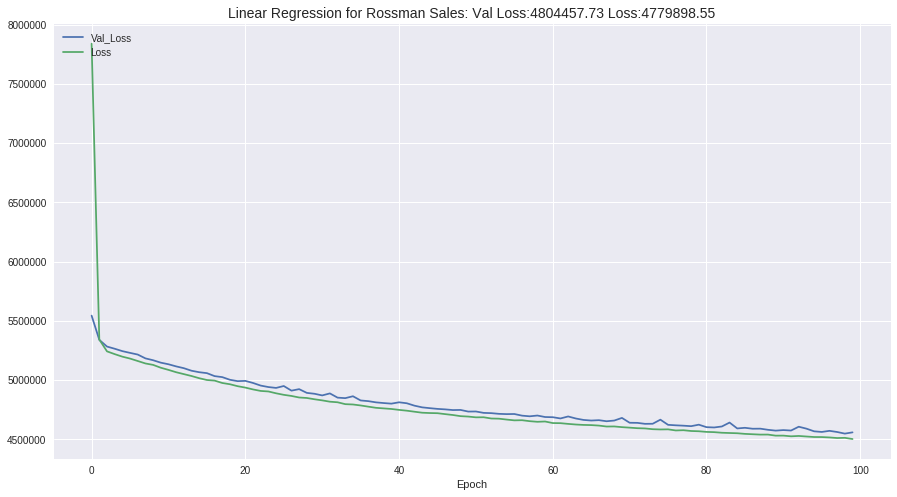

In [0]:
plotTrainingHist(lr_history, 100, 'Linear Regression for Rossman Sales')

In [0]:
y_pred = lr_model.predict(X_test)

<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


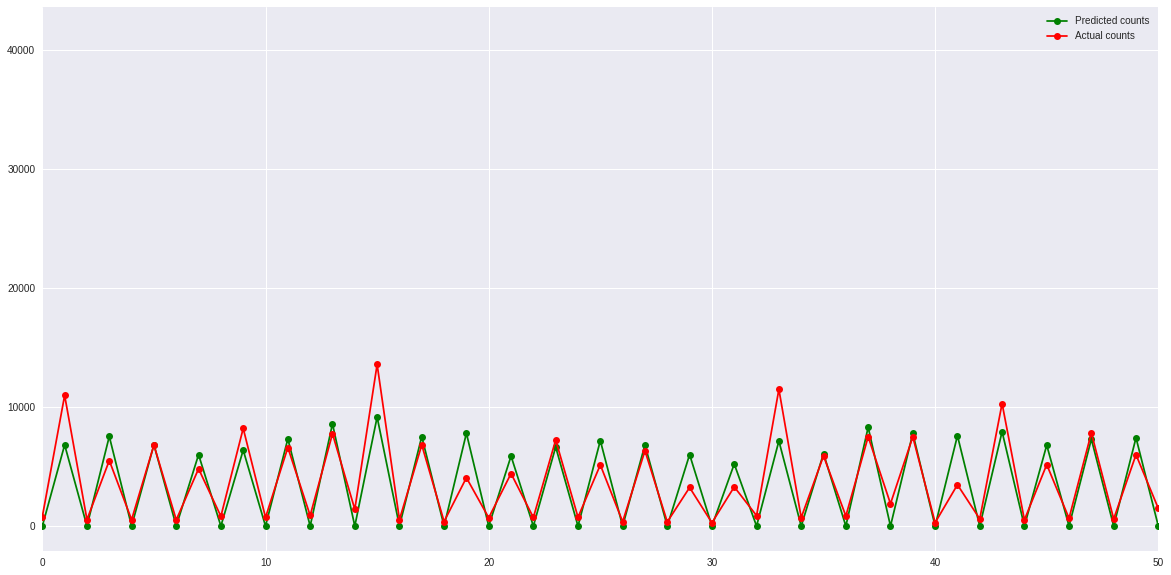

In [0]:
fig = plt.figure()
plt.figure(figsize=(20,10))
plt.title('Linear Regression: Rossman Sales & Customers')
plt.xlim(0,50)
predicted, = plt.plot(pd.DataFrame(y_pred.flatten()), 'go-', label='Predicted counts')
actual, = plt.plot(pd.DataFrame(y_test.flatten()), 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
 
plt.show()

In [0]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1435.193071051175
Mean Squared Error: 4558830.203802782
Root Mean Squared Error: 2135.141729207404


#### Neural Network

In [0]:
X_train, X_test , y_train , y_test = train_test_split(X, y, test_size=0.30, random_state=1)
dnn_model = Sequential()
dnn_model.add(Dense(32,input_shape=(X.shape[1],),activation='relu'))
dnn_model.add(Dense(16,activation='relu'))
dnn_model.add(Dense(4,activation='relu'))
dnn_model.add(Dense(2))
dnn_model.compile(Adam(lr=0.05),'mean_squared_error')
early_stop = EarlyStopping(monitor='val_loss',patience=8,verbose=1)
dn_history = dnn_model.fit(X_train,y_train, verbose=2, epochs=100, validation_data=(X_test,y_test), batch_size=1000,callbacks=[early_stop])

Train on 178737 samples, validate on 76602 samples
Epoch 1/100
 - 1s - loss: 6086171.0352 - val_loss: 4862377.6716
Epoch 2/100
 - 1s - loss: 4796620.2541 - val_loss: 4805304.7094
Epoch 3/100
 - 0s - loss: 4664797.0324 - val_loss: 4530956.0030
Epoch 4/100
 - 0s - loss: 4427741.7318 - val_loss: 4467288.9015
Epoch 5/100
 - 0s - loss: 4345423.5005 - val_loss: 4219390.6532
Epoch 6/100
 - 0s - loss: 4211906.1846 - val_loss: 4265293.8141
Epoch 7/100
 - 0s - loss: 4156049.4217 - val_loss: 4279061.1939
Epoch 8/100
 - 0s - loss: 4069631.9809 - val_loss: 4063703.3854
Epoch 9/100
 - 0s - loss: 4018267.5926 - val_loss: 4085473.2353
Epoch 10/100
 - 0s - loss: 3977287.0053 - val_loss: 4079775.6601
Epoch 11/100
 - 0s - loss: 3973497.4751 - val_loss: 3894190.9438
Epoch 12/100
 - 0s - loss: 3907243.8003 - val_loss: 4242049.0657
Epoch 13/100
 - 0s - loss: 3935592.4932 - val_loss: 4440440.3106
Epoch 14/100
 - 0s - loss: 3871900.1342 - val_loss: 3873474.3019
Epoch 15/100
 - 0s - loss: 3842975.4968 - val_lo

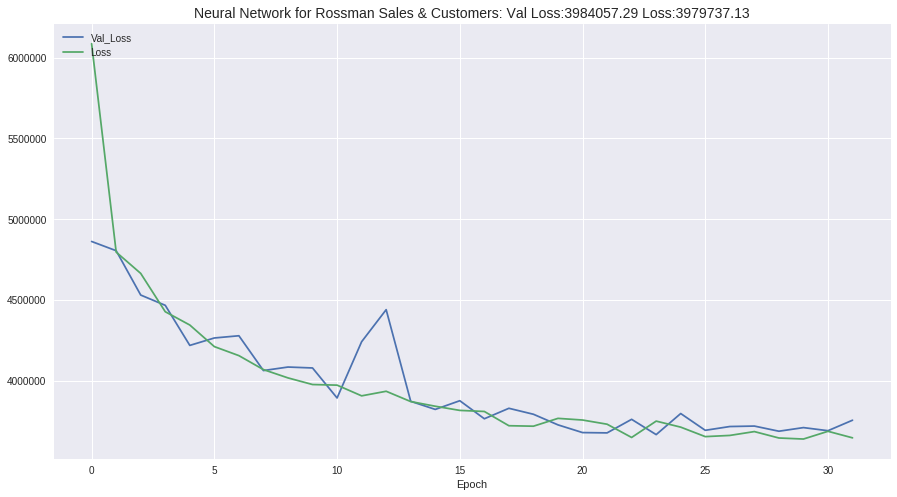

In [0]:
plotTrainingHist(dn_history, 100, 'Neural Network for Rossman Sales & Customers')

In [0]:
y_pred = dnn_model.predict(X_test)

<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


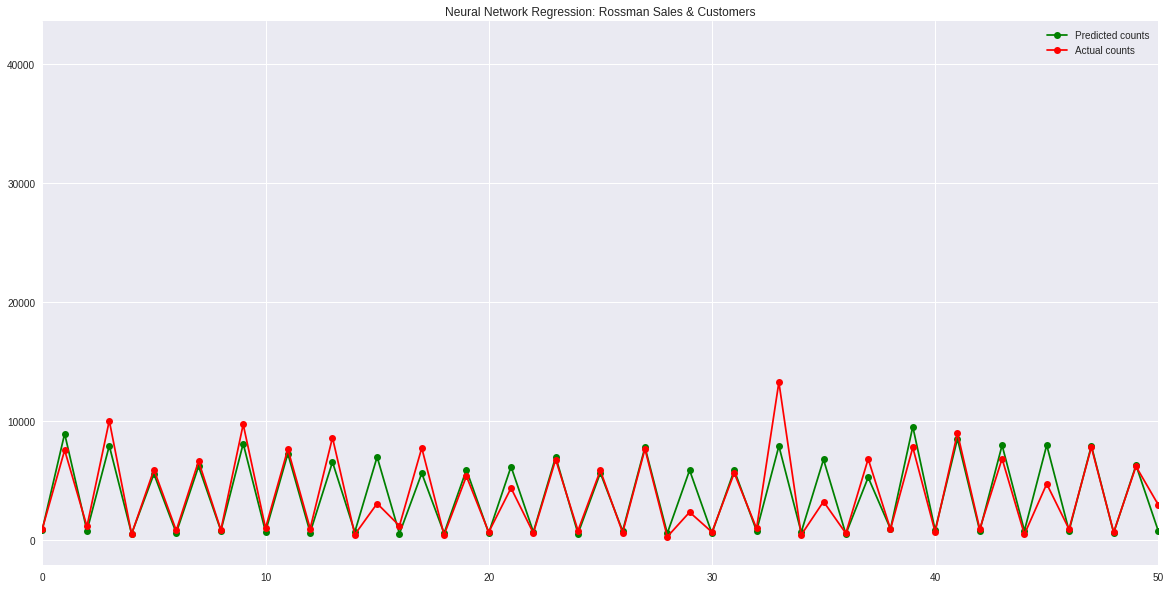

In [0]:
fig = plt.figure()
plt.figure(figsize=(20,10))
plt.title('Neural Network Regression: Rossman Sales & Customers')
plt.xlim(0,50)
predicted, = plt.plot(pd.DataFrame(y_pred.flatten()), 'go-', label='Predicted counts')
actual, = plt.plot(pd.DataFrame(y_test.flatten()), 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
 
plt.show()

In [0]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1105.9878143336841
Mean Squared Error: 3756501.469594877
Root Mean Squared Error: 1938.16961837577
